In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [125]:
dataset=pd.read_excel("Data_Train.xlsx")

In [126]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [127]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [128]:
dataset.dropna(inplace=True)

In [129]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [130]:
dataset["Journey_date"]=pd.to_datetime(dataset["Date_of_Journey"],format="%d/%m/%Y").dt.day
dataset["Journey_month"]=pd.to_datetime(dataset["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [131]:
dataset.drop(["Date_of_Journey"],axis=1,inplace=True)

In [132]:
dataset.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [133]:
dataset["Departure_hour"]=dataset["Dep_Time"].apply(lambda x: x.split(" ")[0].split(":")[0]).astype(int)
dataset["Departure_min"]=dataset["Dep_Time"].apply(lambda x: x.split(" ")[0].split(":")[1]).astype(int)

In [134]:
dataset.drop(["Dep_Time"],axis=1,inplace=True)

In [135]:
dataset["Arrival_hour"]=dataset["Arrival_Time"].apply(lambda x: x.split(" ")[0].split(":")[0]).astype(int)
dataset["Arrival_min"]=dataset["Arrival_Time"].apply(lambda x: x.split(" ")[0].split(":")[1]).astype(int)

In [136]:
dataset.drop(["Arrival_Time"],axis=1,inplace=True)

In [137]:
dataset.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [138]:
dataset[['Duration_hour', 'Duration_min']] = dataset['Duration'].str.extract(r'(?P<hour>\d+)h\s*(?P<min>\d+)m')
dataset["Duration_hour"]=dataset["Duration_hour"].fillna(0).astype(int)
dataset["Duration_min"]=dataset["Duration_min"].fillna(0).astype(int)

In [139]:
dataset.drop(["Duration"],axis=1,inplace=True)

In [140]:
dataset.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [141]:
dataset.Total_Stops=dataset.Total_Stops.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [142]:
dataset.drop(["Route"],axis=1,inplace=True)

In [143]:
dataset.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [144]:
dataset.drop(["Additional_Info"],axis=1,inplace=True)

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  int64 
 4   Price           10682 non-null  int64 
 5   Journey_date    10682 non-null  int32 
 6   Journey_month   10682 non-null  int32 
 7   Departure_hour  10682 non-null  int32 
 8   Departure_min   10682 non-null  int32 
 9   Arrival_hour    10682 non-null  int32 
 10  Arrival_min     10682 non-null  int32 
 11  Duration_hour   10682 non-null  int32 
 12  Duration_min    10682 non-null  int32 
dtypes: int32(8), int64(2), object(3)
memory usage: 834.5+ KB


In [146]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [147]:
dataset=pd.get_dummies(dataset,columns=["Airline","Source","Destination"],drop_first=True).astype(int)

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int32
 1   Price                                      10682 non-null  int32
 2   Journey_date                               10682 non-null  int32
 3   Journey_month                              10682 non-null  int32
 4   Departure_hour                             10682 non-null  int32
 5   Departure_min                              10682 non-null  int32
 6   Arrival_hour                               10682 non-null  int32
 7   Arrival_min                                10682 non-null  int32
 8   Duration_hour                              10682 non-null  int32
 9   Duration_min                               10682 non-null  int32
 10  Airline_Air India                          10682 no

In [120]:
dataset.head()

,Total_Stops,Price,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,0,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


### For Test Data

In [149]:
test_dataset=pd.read_excel("Test_set.xlsx")

In [150]:
test_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [155]:
test_dataset.head()

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [ ]:
test_dataset.isnull().sum()


test_dataset.dropna(inplace=True)


test_dataset.isnull().sum()


test_dataset["Journey_date"]=pd.to_datetime(test_dataset["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_dataset["Journey_month"]=pd.to_datetime(test_dataset["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_dataset.drop(["Date_of_Journey"],axis=1,inplace=True)


test_dataset["Departure_hour"]=test_dataset["Dep_Time"].apply(lambda x: x.split(" ")[0].split(":")[0]).astype(int)
test_dataset["Departure_min"]=test_dataset["Dep_Time"].apply(lambda x: x.split(" ")[0].split(":")[1]).astype(int)
test_dataset.drop(["Dep_Time"],axis=1,inplace=True)



test_dataset["Arrival_hour"]=test_dataset["Arrival_Time"].apply(lambda x: x.split(" ")[0].split(":")[0]).astype(int)
test_dataset["Arrival_min"]=test_dataset["Arrival_Time"].apply(lambda x: x.split(" ")[0].split(":")[1]).astype(int)
test_dataset.drop(["Arrival_Time"],axis=1,inplace=True)



test_dataset[['Duration_hour', 'Duration_min']] = test_dataset['Duration'].str.extract(r'(?P<hour>\d+)h\s*(?P<min>\d+)m')
test_dataset["Duration_hour"]=test_dataset["Duration_hour"].fillna(0).astype(int)
test_dataset["Duration_min"]=test_dataset["Duration_min"].fillna(0).astype(int)
test_dataset.drop(["Duration"],axis=1,inplace=True)




test_dataset.Total_Stops=test_dataset.Total_Stops.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})


test_dataset.drop(["Route"],axis=1,inplace=True)
test_dataset.drop(["Additional_Info"],axis=1,inplace=True)


test_dataset=pd.get_dummies(test_dataset,columns=["Airline","Source","Destination"],drop_first=True).astype(int)

In [159]:
test_dataset.head()

,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [160]:
dataset.shape

(10682, 30)

In [161]:
dataset.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Departure_hour', 'Departure_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [163]:
X=dataset.loc[:,['Total_Stops', 'Journey_date', 'Journey_month',
       'Departure_hour', 'Departure_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers','Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [165]:
X

,Total_Stops,Journey_date,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [164]:
y=dataset.Price

In [166]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int32

In [167]:
feature_important=ExtraTreesRegressor()
feature_important.fit(X,y)

ExtraTreesRegressor()

In [168]:
feature_important.feature_importances_

array([2.63392836e-01, 1.43097071e-01, 5.42298621e-02, 2.66914320e-02,
       2.14351162e-02, 2.86514646e-02, 2.01953117e-02, 6.49575323e-02,
       1.84338576e-02, 1.24035342e-02, 1.70286840e-03, 1.75542110e-02,
       1.43222224e-01, 6.76591552e-02, 2.05569461e-02, 8.73676547e-04,
       3.26665579e-03, 1.31368830e-04, 5.81762426e-03, 8.39301374e-05,
       4.60031135e-04, 1.05673657e-02, 3.11611008e-03, 8.22640017e-03,
       1.30497246e-02, 1.85153373e-02, 6.05522855e-03, 5.12599720e-04,
       2.51405248e-02])

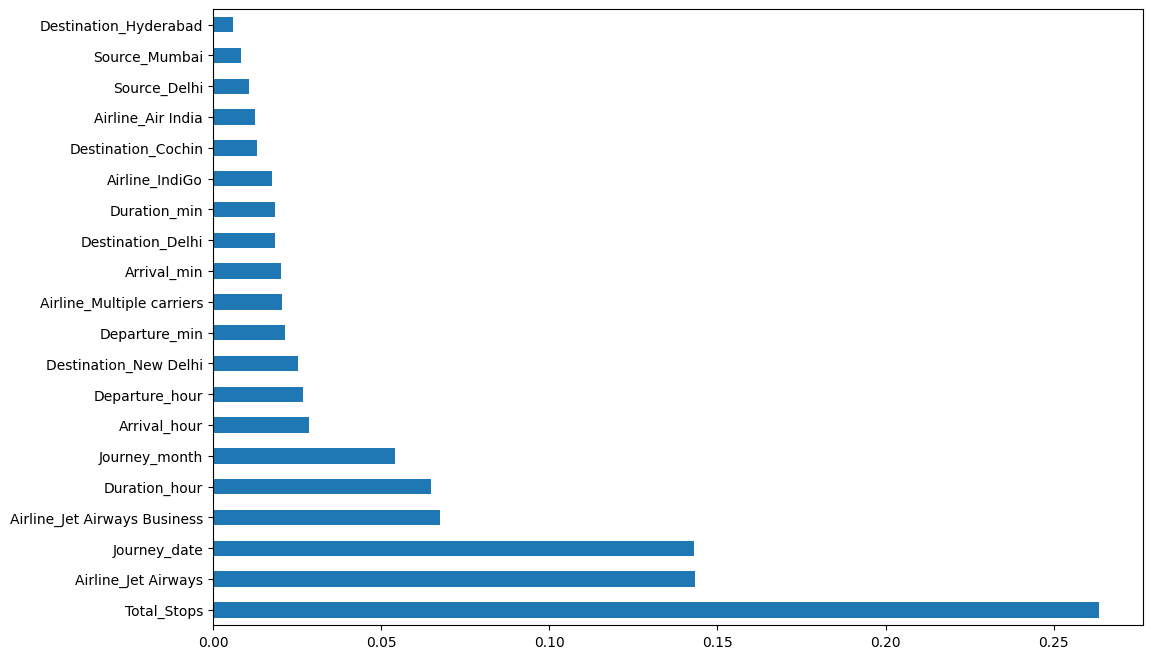

In [169]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(feature_important.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [172]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [174]:
y_pred=rf.predict(X_test)

In [175]:
print(rf.score(X_train,y_train))
print(rf.score(X_test, y_test))

0.9590842534631797
0.8011908473932843


C:\Users\DELL\AppData\Local\Temp\ipykernel_2436\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


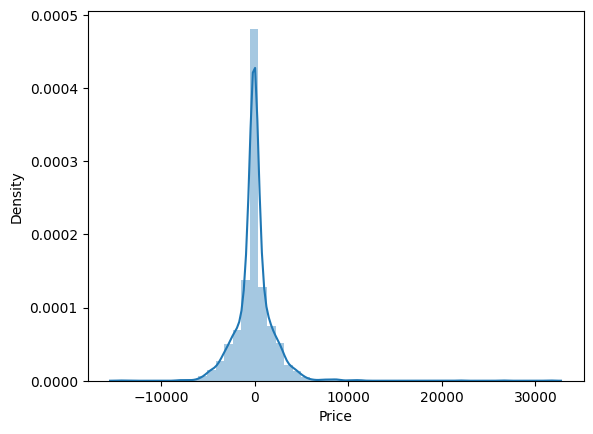

In [177]:
sns.distplot(y_test-y_pred)
plt.show()

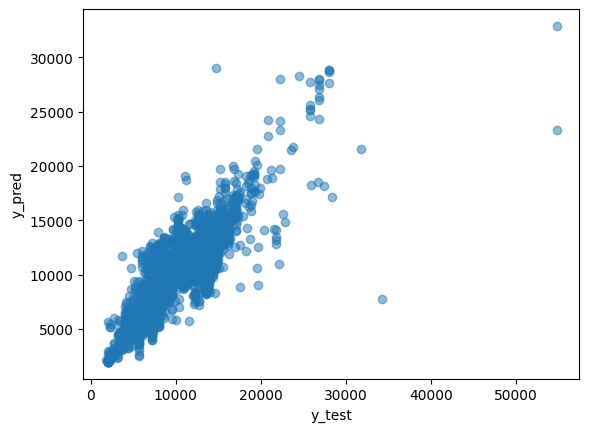

In [178]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [181]:
from sklearn.metrics import r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MAE: 1193.764397271354
MSE: 4043777.521634293
RMSE: 2010.9145982945902
R2: 0.8011908473932843


In [182]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [183]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [186]:
random_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, 
                               cv = 5, verbose=2, random_state=42, n_jobs = 1)
random_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

d:\sunil\Data Science\projects\flight price prediction\flight_prive\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\sunil\Data Science\projects\flight price prediction\flight_prive\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\sunil\Data Science\projects\flight price prediction\flight_prive\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\sunil\Data Science\projects\flight price predi

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [187]:
random_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [188]:
prediction = random_rf.predict(X_test)

In [190]:
from sklearn.metrics import r2_score
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('R2:', r2_score(y_test, prediction))

MAE: 1296.8313366382288
MSE: 4559230.972079718
RMSE: 2135.2355776540717
R2: 0.7758489824803385


In [191]:
import pickle
# open a file, where you ant to store the data
file = open('flight_pred_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [193]:
model = open('flight_pred_rf.pkl','rb')
forest = pickle.load(model)

In [194]:
y_prediction = forest.predict(X_test)

In [195]:
print(r2_score(y_test, y_prediction))

0.8011908473932843
